In [1]:
%pip install numpy
%pip install qiskit
%pip install qiskit-aer
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Work Sheet for Qubit Operation**

**1. 고전적인 비트 연산**

고전적인 bit는 0과 1의 상태를 가질 수 있습니다.

$$0, 1$$

비트로 이진수를 표현할 수 있습니다.
$$ 000 \, (binary) = 0 \, (decimal) $$
$$ 001 \, (binary) = 1 \, (decimal) $$
$$ 010 \, (binary) = 2 \, (decimal) $$
$$ 111 \, (binary) = 8 \, (decimal) $$

In [1]:
a = 0b010 ## 10진수로 2
b = 0b001 ## 10진수로 1

print(a + b) ## 10진수 출력 시 3
print(bin(a+b)) ## 2진수 출력 시 0b11

3
0b11



비트 연산자를 통해 비트를 제어 가능합니다.

AND: 두 비트 모두 1일 때 1 반환

In [3]:
a = 0 & 0
b = 0 & 1
c = 1 & 0
d = 1 & 1

print(f'0 & 0 = {a}')
print(f'0 & 1 = {b}')
print(f'1 & 0 = {c}')
print(f'1 & 1 = {d}')

0 & 0 = 0
0 & 1 = 0
1 & 0 = 0
1 & 1 = 1


OR: 두 비트 중 하나라도 1일 때 1 반환


In [4]:
a = 0 | 0
b = 0 | 1
c = 1 | 0
d = 1 | 1

print(f'0 | 0 = {a}')
print(f'0 | 1 = {b}')
print(f'1 | 0 = {c}')
print(f'1 | 1 = {d}')

0 | 0 = 0
0 | 1 = 1
1 | 0 = 1
1 | 1 = 1


NOT: 비트를 반전시킴

In [5]:
a = 0 ## False
b = 1 ## True

print(f'not False = {not a}')
print(f'not True  = {not b}')

not False = True
not True  = False


**2. qubit에 대해서**


bit과 유사하게, qubit 또한 0과 1의 상태를 가질 수 있습니다.
$$ | 0 \rangle, | 1 \rangle $$

다른 점은, qubit은 0과 1 이외에 중첩 상태를 가질 수 있다는 점이죠.
$$ | \psi \rangle = a | 0 \rangle + b | 1 \rangle $$

이러한 중첩 상태는 어떻게 표현할 수 있을까요?

이를 위해 qubit의 상태는 행렬을 통해 표현합니다.
$$ | 0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, | 1 \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$



따라서 다음과 같이 행렬을 통해 중첩 상태를 표현해줍니다.
$$ |\psi\rangle = a \begin{pmatrix} 1 \\ 0 \end{pmatrix} + b \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} a \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ b \end{pmatrix} = \begin{pmatrix} a \\ b \end{pmatrix} $$

하지만 우리는 qubit의 중첩 상태를 직접 관찰할 수 없고, 0 또는 1의 상태만을 관찰 가능합니다.

그렇다면 중첩 상태가 가지는 의미가 무엇일까요? 이를 설명하기 위해선 파동함수의 측정에 대해 알아야 합니다.

**3. 파동함수의 측정**

양자역학에서 측정 시 결과는 확률로 표현됩니다.

그리고 확률은 파동함수의 크기의 제곱으로 나타낼 수 있습니다. (Born's interpretation)

그런데 파동함수는 허수 값을 가질 수 있는 복소 함수이므로, 크기의 제곱을 구해주기 위해 일반적으로 켤례 복소수를 곱해줍니다.

$$ probability = |\psi|^2 = \psi^* \psi $$

**a. 벡터의 내적**

다음 코드에서 2차원 평면에서의 두 벡터 (1, 2), (3, 1)를 그림으로 확인하실 수 있습니다.

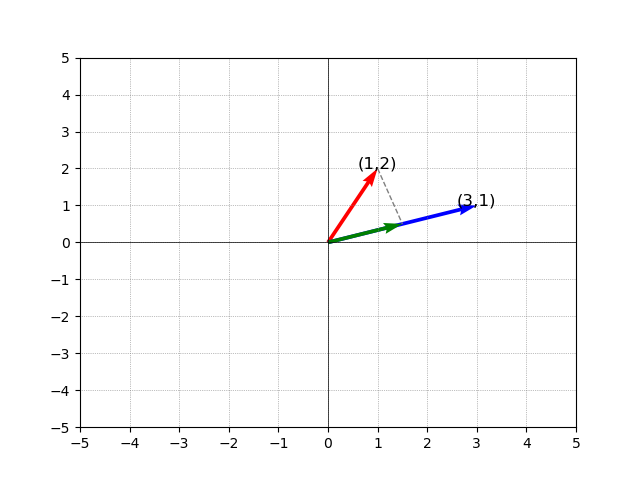

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid(True, linewidth=0.5, linestyle='dotted', color='gray')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

origin = np.array([0, 0])
vector1 = np.array([1, 2]) ## vector1 정의
vector2 = np.array([3, 1]) ## vector2 정의

vector1_proj = np.dot(vector1, vector2) / np.dot(vector2, vector2) * vector2 ## vector2의 vector1에 대한 projection 계산

plt.quiver(*origin, *vector1, color='r', scale=1, scale_units='xy', angles='xy')
plt.text(1, 2, '(1,2)', fontsize=12, ha='center')

plt.quiver(*origin, *vector2, color='b', scale=1, scale_units='xy', angles='xy')
plt.text(3, 1, '(3,1)', fontsize=12, ha='center')

plt.quiver(*origin, *vector1_proj, color='g', scale=1, scale_units='xy', angles='xy')

plt.plot([vector1[0], vector1_proj[0]], [vector1[1], vector1_proj[1]], color='gray', linestyle='--', linewidth=1)

여기서 벡터의 내적이란, 대수적으로는 두 벡터 각 성분의 곱의 합으로 표현될 수 있습니다.

$$ (a, b) \, \cdot (c, d) = ac + bd $$

또한 기하학적으로는 vector1을 vector2로 정사영한 벡터(녹색)의 크기와 vector2의 크기를 곱해주는 것으로 나타낼 수 있습니다.

$$ vector1 \, \cdot vector2 = |vector1| \, \cdot \, |vector2| \, \cdot \, cos\theta $$

한 벡터를 자기 자신에 대해 내적해주면 그 벡터의 크기의 제곱 값이 나오게 됩니다.

$$ vector1 \, \cdot vector1 = |vector1| \, \cdot \, |vector1| \, \cdot \, cos0 = |vector1|^2 = a^2 + b^2 $$


**b. 벡터의 행렬 표현 및 계산**

벡터 (a, b)는 행렬로 다음과 같이 표현됩니다.

$$ (a, b) \, (vector) = \begin{pmatrix} a \\ b \end{pmatrix} \, (matrix) $$

따라서 벡터의 내적은 행렬로 표현 시 앞선 벡터의 전치 행렬을 곱해주게 됩니다.

$$ vector1 \cdot vector2 = \begin{pmatrix} a \\ b \end{pmatrix}^T \begin{pmatrix} c \\ d \end{pmatrix} = \begin{pmatrix} a & b \end{pmatrix} \begin{pmatrix} c \\ d \end{pmatrix} = ac + bd $$

**c. qubit과 기댓값**

앞서 qubit의 중첩상태는 행렬로 표현이 가능하다고 말했습니다.

$$ |\psi \rangle = a | 0 \rangle + b | 1 \rangle = a \begin{pmatrix} 1 \\ 0 \end{pmatrix} + b \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

지금 보니 $|0\rangle$과 $|1\rangle$ 상태는 벡터인 것 같습니다.

그럼 내적을 이용해서 qubit 파동함수의 크기를 계산해줄 수 있겠네요.

복소함수임을 감안하여 켤례 복소수의 전치 행렬을 곱해준다면,

$$ ||\psi\rangle|^2 = (|\psi\rangle^*)^T|\psi\rangle = |\psi\rangle^\dagger|\psi\rangle = \langle\psi|\psi\rangle $$

여기서 bra-ket 표기법에 따라 $|\psi\rangle$의 켤례전치 $|\psi\rangle^\dagger$를 $\langle\psi|$로 표기해줍니다.

$$ \langle\psi| = a \begin{pmatrix} 1 & 0 \end{pmatrix} + b \begin{pmatrix} 0 & 1 \end{pmatrix} = a \langle 0 | + b \langle 1 | $$

따라서 파동함수의 내적은

$$ \langle\psi|\psi\rangle = (a^* \langle 0 | + b^* \langle 1 |) (a | 0 \rangle + b | 1 \rangle) = a^2\langle0|0\rangle + ab\langle0|1\rangle + ab\langle1|0\rangle + b^2\langle1|1\rangle = a^2 + b^2$$

$$ \begin{align*} \langle0|0\rangle &= \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1^2 + 0^2 = 1 \\
\langle0|1\rangle &= \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 1 \cdot 0 + 0 \cdot 1 = 0 \\
\langle1|0\rangle &= \begin{pmatrix} 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 0 \cdot 1 + 1 \cdot 0 = 0 \\
\langle1|1\rangle &= \begin{pmatrix} 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0^2 + 1^2 = 1 \end{align*}$$

위에서 보았던 벡터 내적과 같은 결과를 보입니다.

양자역학에서 측정의 결과는 기댓값으로 나타나고, 그 확률은 파동함수의 크기의 제곱이라고 언급하였습니다.
$$probability = \langle\psi|\psi\rangle = 1 $$ 

확률의 총 합은 1이 되어야 하므로 $a^2 + b^2 = 1$과 같은 제약조건이 생기겠네요.


$\langle0|\psi\rangle$과 같은 내적을 생각해봅시다. 어떤 의미를 가지는 걸까요?

$|\psi\rangle$ 중에서 $|0\rangle$ 방향과 일치하는 성분의 값을 얻을 수 있을 것입니다.

$$\langle0|\psi\rangle = \langle0|(a|0\rangle + b|1\rangle) = a\langle0|0\rangle + b \langle0|1\rangle = a $$

그럼 $\langle0|\psi\rangle$의 제곱인 $|\langle0|\psi\rangle|^2 = a^2$이 바로 중첩상태 $\psi$에서 0을 측정할 확률이 되겠네요.

결국 a와 b는 각 상태가 측정될 확률과 직접적인 관계를 가지고 있다는 것을 알 수 있습니다.

**4. qubit 연산**

qubit도 bit와 같이 연산자를 통해 제어가 가능합니다.

연산자는 2x2 행렬로 이루어져 있고, 행렬곱을 통해 qubit의 상태가 변화합니다.

**a. Pauli gates operation**

스핀의 상태를 변화시키는 연산자인 Pauli matrix는 양자 컴퓨터 이전에도 존재해왔습니다.

$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

$$ X|0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \cdot 1 + 1 \cdot 0 \\ 1 \cdot 1 + 0 \cdot 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle $$

$$ X|1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \cdot 0 + 1 \cdot 1 \\ 1 \cdot 0 + 0 \cdot 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle $$

X gate는 bit에서의 NOT 연산과 같은 역할을 하는 것 같네요.

$$ \begin{align*} Y|0\rangle &= \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \cdot 1 -i \cdot 0 \\ i \cdot 1 + 0 \cdot 0 \end{pmatrix} = \begin{pmatrix} 0 \\ i \end{pmatrix} = i|1\rangle \\

Y|1\rangle &= \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \cdot 0 -i \cdot 1 \\ i \cdot 0 + 0 \cdot 1 \end{pmatrix} = \begin{pmatrix} -i \\ 0 \end{pmatrix} = -i|0\rangle \\

Z|0\rangle &= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \cdot 1 + 0 \cdot 0 \\ 0 \cdot 1 -1 \cdot 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle \\

Z|1\rangle &= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \cdot 0 + 0 \cdot 1 \\ 0 \cdot 0 -1 \cdot 1 \end{pmatrix} = \begin{pmatrix} 0 \\ -1 \end{pmatrix} = -|1\rangle \end{align*}$$

하지만 Y gate와 Z gate는 bit의 연산과 대응되지 않는 것처럼 보입니다.


**b. Hadamard gate**

Pauli gate 이외에, 여러 gate가 많지만 특히 중첩 상태를 형성할 수 있는 Hadamard gate가 양자 컴퓨팅에서 중요한 역할을 하게 됩니다.

$$ H = \frac{1}{\sqrt2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

각 초기 상태에 적용시키게 되면,

$$ \begin{align*} H|0\rangle &= \frac{1}{\sqrt2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt2} \begin{pmatrix} 1 \cdot 1 + 1 \cdot 0 \\ 1 \cdot 1 -1 \cdot 0 \end{pmatrix} = \frac{1}{\sqrt2} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt2} (\begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix}) = \frac{1}{\sqrt2}(|0\rangle + |1\rangle) \\

H|1\rangle &= \frac{1}{\sqrt2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt2} \begin{pmatrix} 1 \cdot 0 + 1 \cdot 1 \\ 1 \cdot 0 -1 \cdot 1 \end{pmatrix} = \frac{1}{\sqrt2} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt2} (\begin{pmatrix} 1 \\ 0 \end{pmatrix} - \begin{pmatrix} 0 \\ 1 \end{pmatrix}) = \frac{1}{\sqrt2}(|0\rangle - |1\rangle) \end{align*} $$

**c. Bloch sphere**

Pauli X, Y, Z, Hadamard gate를 적용한 qubit의 상태의 시각적인 이해를 돕기 위해, Bloch sphere를 사용합니다.

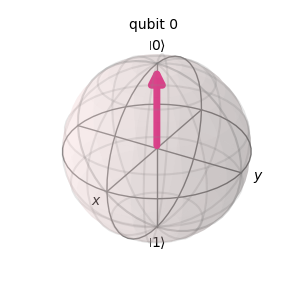

In [25]:
%matplotlib widget
import numpy as np
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector


# |0> 상태 정의
q0 = np.array([[1],
               [0]])

# |0> 상태의 블로흐 구 표현
bloch0 = plot_bloch_multivector(Statevector(q0), figsize=(3, 3))


그림에서 볼 수 있듯이, $|0\rangle$과 $|1\rangle$ 상태는 Z축에 위치합니다. 

X축은 $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt2}$과 $|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt2}$ 상태로 구성되고, Y축은 $|+i\rangle = \frac{|0\rangle + i|1\rangle}{\sqrt2}$과 $|-i\rangle = \frac{|0\rangle - i|1\rangle}{\sqrt2}$ 상태로 구성됩니다.

이렇게 표현했을 때 이점은 무엇일까요?

Bloch sphere에서 연산자를 $|\psi\rangle$ state vector의 회전으로 표현해줄 수 있다는 점입니다.

초기 상태 $|0\rangle$에서 Hadamard gate 적용 시 state vector는 Y축을 기준으로 시계 반대 방향으로 90도 회전하게 됩니다.

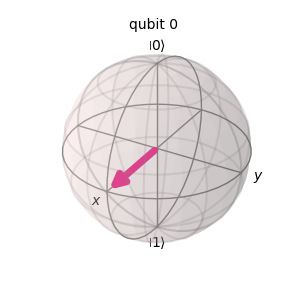

In [29]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Hadamard gate 정의
H = np.array([[1, 1],
             [1, -1]]) / np.sqrt(2)

# |0> 상태에 Hadamard gate 적용
q0_H = np.dot(H, q0)

# H|0> 상태의 블로흐 구 표현
bloch0_H = plot_bloch_multivector(Statevector(q0_H), figsize=(3, 3))

Pauli 행렬은 state vector를 해당하는 축을 기준으로 180도 회전시킵니다.

In [27]:
# Pauli 행렬 정의
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])

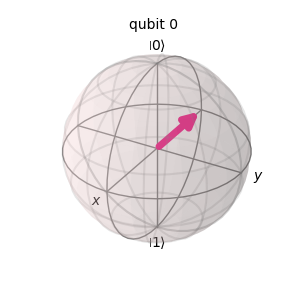

In [20]:
# H|0> 상태에 Pauli-Y gate 적용
q0_H_Y = np.dot(pauli_y, q0_H)

bloch0_H_Y = plot_bloch_multivector(Statevector(q0_H_Y), figsize=(3, 3))

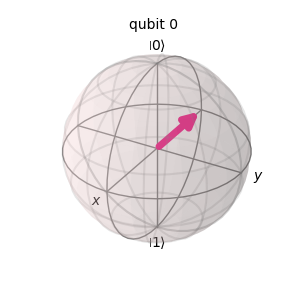

In [21]:
# H|0> 상태에 Pauli-Z gate 적용
q0_H_Z = np.dot(pauli_z, q0_H)

bloch0_H_Z = plot_bloch_multivector(Statevector(q0_H_Z), figsize=(3, 3))

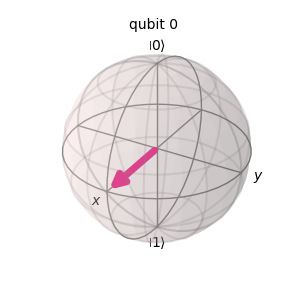

In [30]:
# H|0> 상태에 Pauli-X gate 적용
q0_H_X = np.dot(pauli_x, q0_H)

bloch0_H_X = plot_bloch_multivector(Statevector(q0_H_X), figsize=(3, 3))

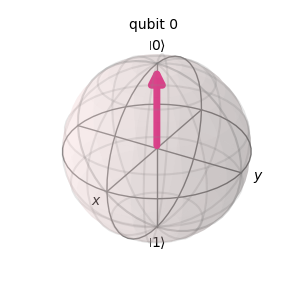

In [31]:
# H|0> 상태에 Hadamard gate 적용
q0_H_H = np.dot(H, q0_H)

bloch0_H_H = plot_bloch_multivector(Statevector(q0_H_H), figsize=(3, 3))

**Quiz)** $|1\rangle$ 상태에 대해, $|+\rangle$ 상태를 만들기 위해 어떠한 연산을 해야할지 추측해봅시다. None 위치에 직접 채워 넣어보세요.

In [24]:
q1 = np.array([[None],
               [None]])

q1_first  = np.dot(None, None)
q1_second = np.dot(None, None)

bloch = plot_bloch_multivector(Statevector(q1_second), figsize=(3, 3))

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

**5. Quantum entanglement**

실제 양자 컴퓨팅은 하나의 qubit이 아닌 여러개의 qubit을 사용하게 됩니다.

여러 개의 qubit을 사용하므로써 생기는 양자 컴퓨팅의 또 다른 이점이 나타나게 되는데, 바로 얽힘(entanglement) 현상입니다.

우선 얽힘 상태에 들어가기 앞서 두 qubit이 서로 독립적인 상태인 product state에 대해 알아보도록 합시다.

**a. Product state과 tensor product**

$|0\rangle$로 초기화된 독립적인 두 qubit이 있다고 생각해봅시다. 

$$ |\psi_1\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad |\psi_2\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

이를 하나의 state vector로 나타내기 위해선 어떤 식으로 표현해야할까요?

텐서 곱(tensor product), 또는 크로네커 곱(Kronecker product)은 두 행렬이 만들어낼 수 있는 모든 값을 표현해주는 연산입니다.

$$ A \otimes B = \begin{pmatrix} a_1 & a_2 \\ a_3 & a_4 \end{pmatrix} \otimes \begin{pmatrix} b_1 & b_2 \\ b_3 & b_4 \end{pmatrix} = \begin{pmatrix} a_1B & a_2B \\ a_3B & a_4B \end{pmatrix} = \begin{pmatrix} a_1b_1 & a_1b_2 & a_2b_1 & a_2b_2 \\ a_1b_3 & a_1b_4 & a_2b_3 & a_2b_4 \\ a_3b_1 & a_3b_2 & a_4b_1 & a_4b_2 \\ a_3b_3 & a_3b_4 & a_4b_3 & a_4b_4 \end{pmatrix} $$

따라서 두 $|0\rangle$ 상태의 product state는

$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} $$

같은 원리로 $|0\rangle$와 $|1\rangle$의 product state는

$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} $$

확인해보니 두 qubit으로 표현할 수 있는 $2^2$가지의 경우의 수만큼의 결과가 나올 수 있는 것 같습니다. 따라서 다음과 같이 간편하게 표현할 수 있겠네요.

$$ |0\rangle \otimes |0\rangle = |00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, \quad |0\rangle \otimes |1\rangle = |01\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \quad |1\rangle \otimes |0\rangle = |10\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, \quad |1\rangle \otimes |1\rangle = |11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$$

이진수 표기법에 따라 $|00\rangle = |0\rangle$과 $|10\rangle = |2\rangle$등의 표현도 가능할 것 같습니다.

**Quiz)** 다음과 같은 상태는 몇 개의 qubit이 필요하고, 어떤 qubit들의 product state일까요?
$$\begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}$$

In [34]:
import numpy as np

def product_state(*args):
    for i, qubit in enumerate(args):
        if i == 0:
            state = qubit
        else:
            state = np.kron(state, qubit)

    return state


q0 = np.array([[1],
               [0]])

q1 = np.array([[0],
               [1]])

# tensor product 연산
psi = product_state(None)

print(psi)

None


**b. Two qubit gate와 entengled state**

얽힘에 대한 설명에 들어가기 앞서, 이제는 두 qubit에 작용하는 two qubit gate에 대해 설명할 수 있을 것 같습니다.

 two qubit gate 역시 여러 종류가 존재하지만, 연산에 주로 사용되는 controlled NOT (CNOT, CX) gate는 다음과 같습니다.

$$ CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $$

CNOT gate는 control qubit이 $|0\rangle$인 겅우 아무런 연산을 하지 않고, control qubit이 $|1\rangle$인 경우 target qubit에 NOT (Pauli X) 연산을 수행합니다.

실제 행렬 연산을 수행한다면 더 명확히 이해할 수 있습니다.

$$ CNOT |00\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = |00\rangle, \qquad CNOT |01\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = |01\rangle \\$$

$$CNOT |10\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = |11\rangle, \qquad CNOT |11\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = |10\rangle $$


이러한 CNOT 게이트와 중첩 상태를 형성하는 Hadamard gate를 이용해 entengled state의 예시인 Bell state에 대해 알아보겠습니다.

우선 두 개의 qubit을 $|0\rangle$로 초기화시킵니다.

$$ |\psi_1\rangle = |0\rangle \otimes |0\rangle $$

이 중 첫 번째 qubit에 Hadamard gate를 적용시킵니다.

(이 때 두 번째 qubit에 아무런 연산을 하지 않는다는 것을 표현하기 위해 Identity matrix를 곱해줍니다.)

$$ |\psi_2\rangle = (H \otimes I)(|0\rangle \otimes |0\rangle) = H|0\rangle \otimes I|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt2} \otimes |0\rangle = \frac{|0\rangle \otimes |0\rangle + |1\rangle \otimes |0\rangle}{\sqrt2}$$

다음으로 첫 번째 qubit을 control qubit으로, 두 번째 qubit을 target qubit으로 하여 CX (CNOT) 게이트를 적용시킵니다.

$CX|00\rangle = |00\rangle$이고, $CX|10\rangle = |11\rangle$이므로

$$ |\psi_3\rangle = CX|\psi_2\rangle = \frac{|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle}{\sqrt2} = \frac{|00\rangle + |11\rangle}{\sqrt2} = |\Phi^+\rangle$$

결과적으로 Bell state가 만들어졌습니다.

눈치채셨나요? 만들어진 Bell state는 두 개의 qubit 중 한 개의 qubit을 측정한다면, 나머지 qubit의 상태를 자동으로 알게 됩니다.

한 qubit이 $|0\rangle$으로 측정되면, 남은 qubit의 상태도 $|0\rangle$인 것이죠.

얽힌 상태의 qubit들은 동시에 여러 계산을 수행할 수 있습니다. 이는 고전 컴퓨터에서 볼 수 없었던 장점이 되어 특정 문제를 해결할 때 훨씬 빠른 속도를 가능하게 만듭니다.

**6. Quantum Circuit**

점점 머리가 아프기 시작했습니다. qubit 두 개만 해도 수식 세 줄을 사용해야 한다니?

여러분의 노트북은 64 bit 운영체제를 가지고 있습니다. 64개의 qubit은 상상만 해도 끔찍합니다.

과연 양자 컴퓨터의 알고리즘을 이해하려면 항상 이렇게 많은 수식을 따라가야 하는 걸까요?

다행히도 그렇지 않습니다. 우리가 양자 컴퓨팅을 할 때 bit를 모방한 qubit을 사용한 이유가 여기에 있습니다.

고전적인 전자 회로(electronic circuit)에 대응되는 양자 회로(quantum circuit)가 존재하고, 이를 이용해 양자 알고리즘을 표현하며 이해를 돕습니다.

방금 설명드린 Bell state를 만드는 quantum circuit은 다음과 같이 표현됩니다.

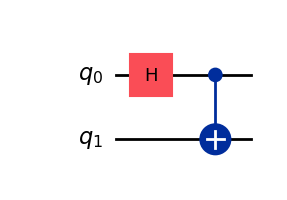

In [38]:
%matplotlib widget
from qiskit import QuantumCircuit

qc = QuantumCircuit(2) # 두개의 qubit을 가지는 quantum circuit 생성

qc.h(0) # Hadamard gate를 첫번째 qubit에 적용

qc.cx(0, 1) # 첫번째 qubit을 control qubit, 두번째 qubit을 target qubit으로 한 controlled not gate 적용

visualize = qc.draw('mpl') # quantum circuit 그리기


Quantum circuit에서 각 줄은 서로 다른 qubit을 나타냅니다.

H는 아마도 Hadamard gate일 것이고, 파란색 세로 선이 CNOT gate를 표현한 것입니다.

왼쪽에서 시작되어 오른쪽으로 갈 수록 연산이 진행됨을 의미합니다.



**a. Quantum circuit simulator를 이용한 측정**

결과를 확인하기 위해서 측정도 빼먹을 수 없겠죠.

측정을 수행하기 위해 IBM에 1초당 2000원을 내고 원격으로 양자 컴퓨터를 사용해볼 수도 있겠지만,

우선은 qiskit 모듈에 내장된 Aer 시뮬레이터를 이용해봅시다.

측정 결과: {'00': 525, '11': 475}


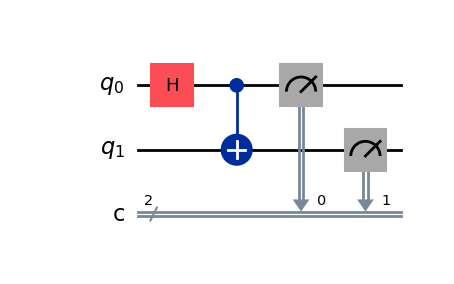

In [39]:
from qiskit import QuantumCircuit
from qiskit_aer import AerProvider

# Bell state 생성
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Bell state 측정
qc.measure(0, 0) # 첫번째 qubit을 측정하여 첫번째 classical bit에 저장
qc.measure(1, 1) # 두번째 qubit을 측정하여 두번째 classical bit에 저장

qc.draw('mpl') # quantum circuit 그리기

simulator = AerProvider().get_backend('qasm_simulator') # qasm simulator 사용
result = simulator.run(qc, shots=1000).result() # quantum circuit 1000번 실행

print(f'측정 결과: {result.get_counts()}') # 결과값 출력

측정은 시뮬레이터를 통해 확률적으로 이루어지며, 따라서 여러 번 측정을 수행해야 합니다.

측정 횟수가 많을 수록 정확도가 높아지지만, 그만큼 시뮬레이터의 계산 시간이 증가합니다.

다음은 시뮬레이터로 1000만 번 측정하는 코드입니다.

In [42]:
print('계산이 진행되는 중..', flush=True)

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

simulator = AerProvider().get_backend('qasm_simulator')

result = simulator.run(qc, shots=10000000).result() # quantum circuit 1000만번 실행

print(f'측정 결과: {result.get_counts()}')

계산이 진행되는 중..
측정 결과: {'11': 5000925, '00': 4999075}


**Quiz)** qubit의 상태를 이진법으로 표현하고, 그 값에 +1을 하는 quantum circuit을 만들어 봅시다.

(힌트: three qubit gate ccx가 존재 함)

1

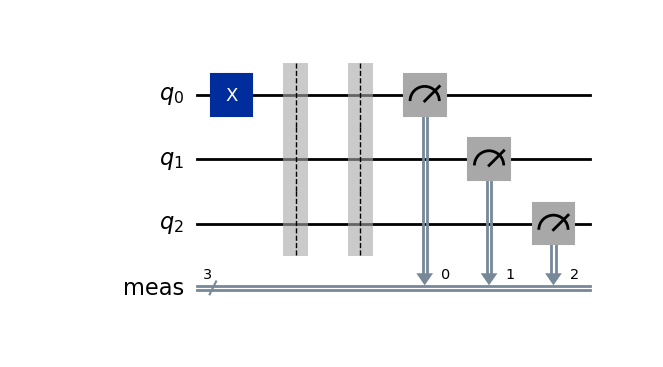

In [296]:
from qiskit import QuantumCircuit

def plus_one(num):
    num = bin(num)[2:] # num을 2진수로 변환

    qc = QuantumCircuit(3) # 3개의 qubit을 가지는 quantum circuit 생성

    # 2진수를 qubit에 저장
    for i, bit in enumerate(reversed(num)):
        if bit == '1':
            qc.x(i)

    qc.barrier()


    ##### plus one 연산 (gate를 추가해 봅시다)

    None

    #####

    qc.measure_all() # 측정

    qc.draw('mpl') # quantum circuit 그리기

    count = simulator.run(qc, shots=1000).result().get_counts() # qasm simulator 사용
    num_plus_one = list(count.keys())[0]

    return int(num_plus_one, 2) # 2진수를 10진수로 변환하여 반환

plus_one(1)

**Quiz)** 세 개의 qubit이 다음과 같은 entangled state를 이루는 circuit을 만들어 봅시다.

$$ |\psi\rangle = \frac{|000\rangle + |111\rangle}{\sqrt2} $$

{'000': 488, '111': 512}


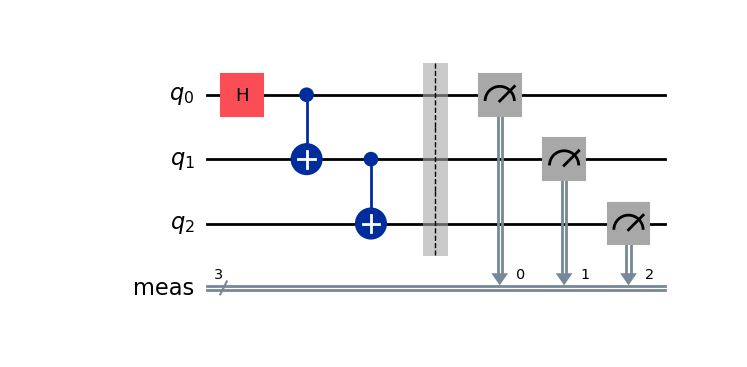

In [301]:
qc = QuantumCircuit(3)

##### gate를 추가해봅시다.

None

#####

qc.measure_all()

qc.draw('mpl')

count = simulator.run(qc, shots=1000).result().get_counts()
print(count)


**번외) Rotation gates**

앞서 Pauli X, Y, Z gate들은 각 축을 기준으로 180도 회전하는 연산을 수행한다고 설명했습니다.

그렇다면 각 축을 기준으로 임의의 각도를 회전하는 연산자도 존재할까요?

Rotation gate라고 부르는 연산자가 존재합니다. 각각 다음과 같이 정의되는데,

$$ R_x(\theta) = \exp(-iX\theta/2), \quad R_y(\theta) = \exp(-iY\theta/2), \quad R_z(\theta) = \exp(-iZ\theta/2) $$

$R_x(\theta)$에 대해서 표현해 봅시다. exponential 항을 Taylor 전개 하면,

$$ \begin{align*} R_x(\theta) &= \exp(-iX\theta/2) = \frac{1}{0!}(-iX\theta/2)^0 + \frac{1}{1!}(-iX\theta/2)^1 + \frac{1}{2!}(-iX\theta/2)^2 + \cdots \\[15pt] &= 1 - i\frac{1}{1!}(\theta/2)X + \frac{1}{2!}(\theta/2)^2X^2 - i\frac{1}{3!}(\theta/2)^3X^3 + \frac{1}{4!}(\theta/2)^4X^4 + \cdots \\[15pt] &= (1 + \frac{1}{2!}(\theta/2)^2 + \frac{1}{4!}(\theta/2)^4 + \cdots)I - i(\frac{1}{1!}(\theta/2) + \frac{1}{3!}(\theta/2)^3 + \frac{1}{5!}(\theta/2)^5 + \cdots)X \\[15pt] &= \cos(\theta/2)I -i\sin(\theta/2)X = \cos(\theta/2) \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} -i \sin(\theta/2) \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \\[15pt] &= \begin{pmatrix} \cos(\theta/2) & 0 \\ 0 & \cos(\theta/2) \end{pmatrix} - \begin{pmatrix} 0 & i \sin(\theta/2) \\ i \sin(\theta/2) & 0 \end{pmatrix} = \begin{pmatrix} \cos(\theta/2) & -i \sin(\theta/2) \\ -i \sin(\theta/2) & \cos(\theta/2) \end{pmatrix} \end{align*} $$

로 나타납니다.

$R_x(\pi)$ 의 경우 $\begin{pmatrix} \cos(\pi/2) & -i \sin(\pi/2) \\ -i \sin(\pi/2) & \cos(\pi/2) \end{pmatrix} = \begin{pmatrix} 0 & -i \\ -i & 0 \end{pmatrix} = -iX$의 형태를 가지며, X 연산자와 -i만큼의 위상차 외엔 동일한 연산을 수행한다는 점을 알 수 있습니다.